In [4]:
from tools.FileParser import FileParser as FP
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load a file
Using the **Data** menu at the top of the notebook

Data --> Upload

Copy the file link that it returns (e.g. /home/nbuser/vtg_log7_wheel.csv)

In [5]:
data = FP.openFile("/home/nbuser/Car_in_a_circle_demo.csv")

Plot of acceleration in x, y and z

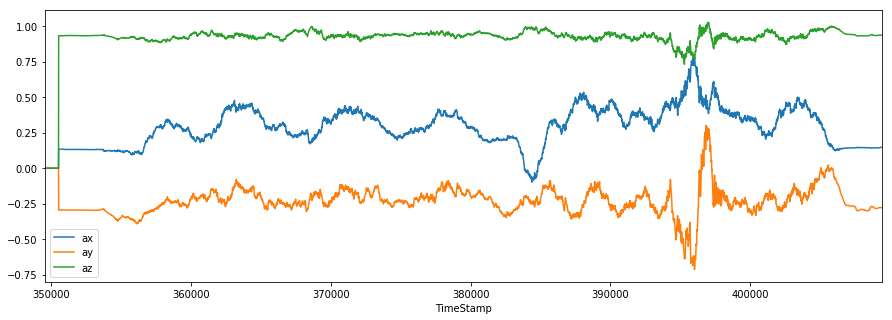

In [6]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 5]
imu = data[1].copy()
imu['ax'] = np.nan_to_num(imu['ax'].rolling(window=100).mean())
imu['ay'] = np.nan_to_num(imu['ay'].rolling(window=100).mean())
imu['az'] = np.nan_to_num(imu['az'].rolling(window=100).mean())
imu.plot(x='TimeStamp',y=['ax','ay','az'])

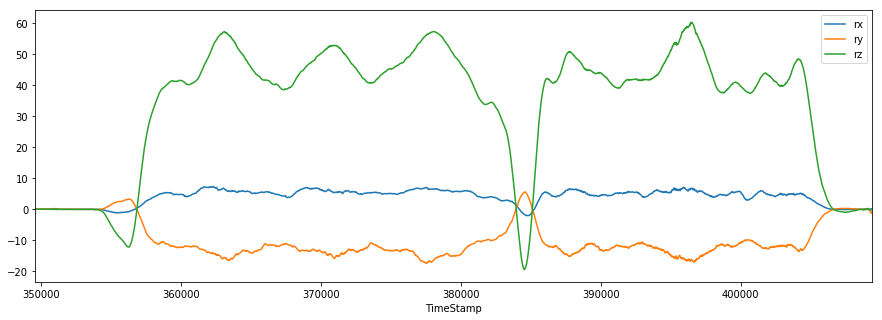

In [7]:
imu['rx'] = np.nan_to_num(imu['rx'].rolling(window=100).mean())
imu['ry'] = np.nan_to_num(imu['ry'].rolling(window=100).mean())
imu['rz'] = np.nan_to_num(imu['rz'].rolling(window=100).mean())
imu.plot(x='TimeStamp',y=['rx','ry','rz'])

In [8]:
!pip install mplleaflet
import mplleaflet

gps = data[0].copy()
plt.plot(gps['x'], gps['y'])
mplleaflet.display()

  Running setup.py bdist_wheel for mplleaflet ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/bf/fd/0b/0513de62c339c4a56e2234aa42a5d06e6660a4446fdae7b796
Successfully built mplleaflet


In [9]:

#https://stackoverflow.com/questions/21201618/pandas-merge-match-the-nearest-time-stamp-the-series-of-timestamps
#get matching indexes
idx = np.searchsorted(gps['TimeStamp'], imu['TimeStamp']) - 1
mask = idx >= 0


time_sorted_imu = pd.DataFrame({
    "TimeStamp":imu['TimeStamp'].values[mask],
    "x":gps['x'].values[idx][mask],
    "y":gps['y'].values[idx][mask],
    "ax":imu['ax'].values[mask],
    "ay":imu['ay'].values[mask]
})
#We downsample the data as the full set is hard to render!
quiver_plot_output = time_sorted_imu[0::10]

plt.quiver(quiver_plot_output['x'], quiver_plot_output['y'],quiver_plot_output['ax'], quiver_plot_output['ay'], width=0.001)
plt.plot(gps['x'], gps['y'])
mplleaflet.display(tiles="esri_aerial")

In [10]:
!pip install numpy-quaternion

    100% |████████████████████████████████| 163kB 6.5MB/s ta 0:00:01


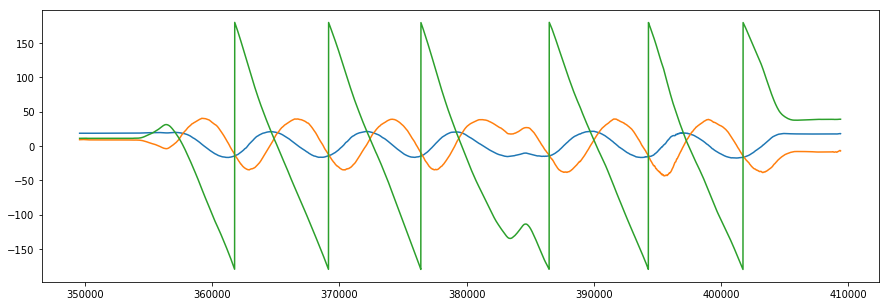

In [11]:

import quaternion
from tools.Conversions import RollPitchYaw
quat = data[2].copy()
#row = quat.values[0]
#quat = np.quaternion(row[2],row[3],row[4],row[5])
euler = RollPitchYaw.convert(quat.values)
#plt.quiver(gps['x'],gps['y'],imu['ax'],imu['ay'])
plt.plot(quat['TimeStamp'],euler)

In [12]:
RollPitchYaw.transform(np.array([imu['ax'][1000],imu['ay'][1000],imu['az'][1000]]),quat.values[0][2:6])

array([-0.01761352, -0.03661917,  0.98941567])

In [39]:
idx = np.searchsorted(quat['TimeStamp'], imu['TimeStamp']) - 1
mask = idx >= 0


quat_matched_imu = pd.DataFrame({
    "TimeStamp":imu['TimeStamp'].values[mask],
    "q0":quat['q0'].values[idx][mask],
    "q1":quat['q1'].values[idx][mask],
    "q2":quat['q2'].values[idx][mask],
    "q3":quat['q3'].values[idx][mask],
    "ax":imu['ax'].values[mask],
    "ay":imu['ay'].values[mask],
    "az":imu['az'].values[mask],
    "rx":imu['rx'].values[mask],
    "ry":imu['ry'].values[mask],
    "rz":imu['rz'].values[mask]
})
quat_matched_imu_world = quat_matched_imu

quat_i = np.array([quat_matched_imu['q0'],quat_matched_imu['q1'],quat_matched_imu['q2'],quat_matched_imu['q3']]).T
accel = np.array([quat_matched_imu['ax'],quat_matched_imu['ay'],quat_matched_imu['az']]).T
rot = np.array([quat_matched_imu['rx'],quat_matched_imu['ry'],quat_matched_imu['rz']]).T
accel_world = RollPitchYaw.transform(accel,quat_i)
rot_world = RollPitchYaw.transform(rot,quat_i)
quat_matched_imu_world['ax'] = accel_world[0]
quat_matched_imu_world['ay'] = accel_world[1]
quat_matched_imu_world['az'] = accel_world[2]
quat_matched_imu_world['rx'] = rot_world[0]
quat_matched_imu_world['ry'] = rot_world[1]
quat_matched_imu_world['rz'] = rot_world[2]
    

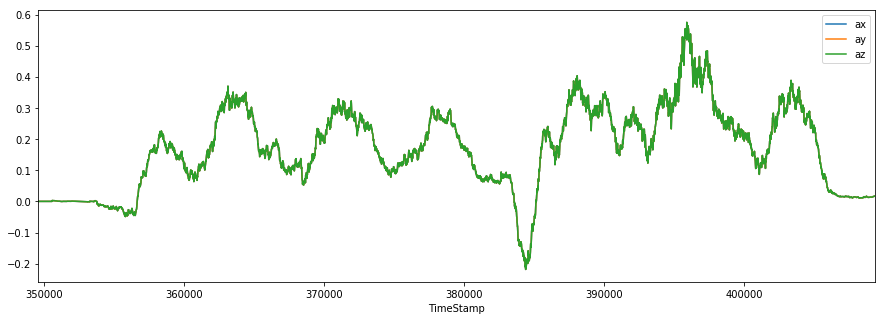

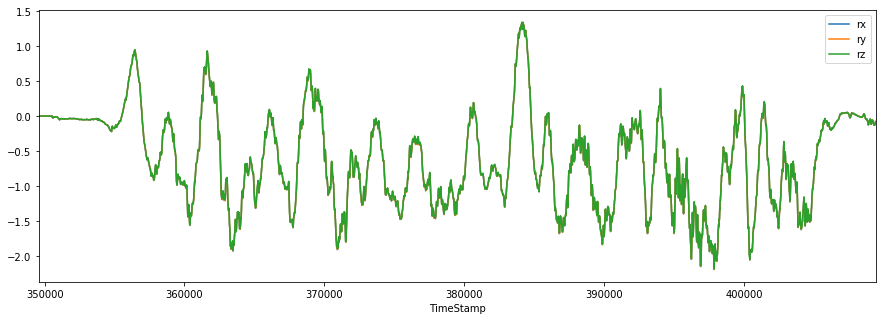

In [42]:
quat_matched_imu_world.plot(x='TimeStamp',y=['ax','ay','az'])
quat_matched_imu_world.plot(x='TimeStamp',y=['rx','ry','rz'])